In [1]:
import pandas as pd
import glob
import scipy.misc
import imageio
import skimage
from tqdm import tqdm
import requests  
import re
from bs4 import BeautifulSoup  
from urllib.request import urlretrieve
import ast 
import matplotlib.pyplot as plt 
from skimage import io
import skimage
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# import shutil
# shutil.rmtree("/home/pjuneja/DSC160/Project/data/posters/")

In [3]:
# Data sourced from Kaggle: https://www.kaggle.com/neha1703/movie-genre-from-its-poster#MovieGenre.csv
path = "/home/pjuneja/DSC160/Project/data/MovieGenre.csv"
movies_df = pd.read_csv(path, encoding = "ISO-8859-1")
movies_df

imdbId                           Imdb Link  \
0      114709  http://www.imdb.com/title/tt114709   
1      113497  http://www.imdb.com/title/tt113497   
2      113228  http://www.imdb.com/title/tt113228   
3      114885  http://www.imdb.com/title/tt114885   
4      113041  http://www.imdb.com/title/tt113041   
...       ...                                 ...   
40103   83168   http://www.imdb.com/title/tt83168   
40104   82875   http://www.imdb.com/title/tt82875   
40105  815258  http://www.imdb.com/title/tt815258   
40106   79142   http://www.imdb.com/title/tt79142   
40107   70710   http://www.imdb.com/title/tt70710   

                                    Title  IMDB Score  \
0                        Toy Story (1995)         8.3   
1                          Jumanji (1995)         6.9   
2                 Grumpier Old Men (1995)         6.6   
3                Waiting to Exhale (1995)         5.7   
4      Father of the Bride Part II (1995)         5.9   
...                                   ...         ...   
40103               Tanya's Island (1980)         4.3   
40104               Pacific Banana (1981)         4.7   
40105  Werewolf in a Womens Prison (2006)         4.5   
40106              Xiao zi ming da (1979)         6.5   
40107                     Snatched (1973)         6.5   

                            Genre  \
0      Animation|Adventure|Comedy   
1         Action|Adventure|Family   
2                  Comedy|Romance   
3            Comedy|Drama|Romance   
4           Comedy|Family|Romance   
...                           ...   
40103                       Drama   
40104                      Comedy   
40105                      Horror   
40106               Action|Comedy   
40107        Crime|Drama|Thriller   

                                                  Poster  
0      https://images-na.ssl-images-amazon.com/images...  
1      https://images-na.ssl-images-amazon.com/images...  
2      https://images-na.ssl-images-amazon.com/images...  
3      https://images-na.ssl-images-amazon.com/images...  
4      https://images-na.ssl-images-amazon.com/images...  
...                                                  ...  
40103  https://images-na.ssl-images-amazon.com/images...  
40104  https://images-na.ssl-images-amazon.com/images...  
40105  https://images-na.ssl-images-amazon.com/images...  
40106  https://images-na.ssl-images-amazon.com/images...  
40107                                                NaN  

[40108 rows x 6 columns]

In [4]:

#function to calculate image stats
def calc_stats(filename):
    image = io.imread(filename)
    shape_val = image.shape
    
    width = shape_val[1]
    height = shape_val[0]
    
    hsv_img = rgb2hsv(image)
    
    hue_img = hsv_img[:, :, 0]
    hue_avg = np.mean(hue_img, axis=(0,1))
    
    saturation_img = hsv_img[:,:, 1]
    saturation_avg = np.mean(saturation_img, axis=(0,1))
    
    value_img = hsv_img[:, :, 2]
    value_avg = np.mean(value_img, axis=(0,1))
    
    resolution = width*height
    
    image_stats = [filename ,width, height, hue_avg, saturation_avg, value_avg, resolution]
    return image_stats

In [5]:
#function to download poster from url
            
def retrieve_poster(ids, urls, data_path, num_imgs):
    i = 0
    while len(os.listdir(data_path)) != num_imgs:
        try:
            urlretrieve(urls[i], data_path + str(ids[i]) + ".jpg")
        except Exception as e:
            pass
        i += 1

In [6]:
# ids = movies_df["imdbId"]
# urls = movies_df["Poster"]

# data_path = "/home/pjuneja/DSC160/Project/data/posters/"
# retrieve_poster(ids, urls, data_path)

In [7]:
# Data sourced from Kaggle: https://www.kaggle.com/neha1703/movie-genre-from-its-poster#MovieGenre.csv
path = "./data/MovieGenre.csv"
movies_df = pd.read_csv(path, encoding = "ISO-8859-1")
movies_df.head()

imdbId                           Imdb Link  \
0  114709  http://www.imdb.com/title/tt114709   
1  113497  http://www.imdb.com/title/tt113497   
2  113228  http://www.imdb.com/title/tt113228   
3  114885  http://www.imdb.com/title/tt114885   
4  113041  http://www.imdb.com/title/tt113041   

                                Title  IMDB Score                       Genre  \
0                    Toy Story (1995)         8.3  Animation|Adventure|Comedy   
1                      Jumanji (1995)         6.9     Action|Adventure|Family   
2             Grumpier Old Men (1995)         6.6              Comedy|Romance   
3            Waiting to Exhale (1995)         5.7        Comedy|Drama|Romance   
4  Father of the Bride Part II (1995)         5.9       Comedy|Family|Romance   

                                              Poster  
0  https://images-na.ssl-images-amazon.com/images...  
1  https://images-na.ssl-images-amazon.com/images...  
2  https://images-na.ssl-images-amazon.com/images...  
3  https://images-na.ssl-images-amazon.com/images...  
4  https://images-na.ssl-images-amazon.com/images...

In [8]:
def retrieve_poster(ids, urls, data_path, limit):
    idx = 0
    for i in range(len(urls)):
        if idx==limit:
            break
        try:
            urlretrieve(urls[i], data_path + str(ids[i]) + ".jpg")
            idx += 1
        except Exception as e:
            continue

In [9]:
movies_df_nan = movies_df.dropna(subset=['Genre','Poster'])
movies_df_horror = movies_df_nan[movies_df_nan['Genre'].str.contains('Horror')]
movies_df_romance = movies_df_nan[movies_df_nan['Genre'].str.contains('Romance')]

In [10]:
len(movies_df_horror), len(movies_df_romance)


(3983, 6189)

In [11]:
# ids = movies_df_horror["imdbId"]
# urls = movies_df_horror["Poster"]
# data_path = "/home/pjuneja/DSC160/Project/data/posters/Horror/"
# retrieve_poster(ids, urls, data_path, 2000)

In [12]:
# ids = movies_df_romance["imdbId"]
# urls = movies_df_romance["Poster"]
# data_path = "/home/pjuneja/DSC160/Project/data/posters/Romance/"
# retrieve_poster(ids, urls, data_path, 2000)

In [13]:
def calc_stats(filename):
    image = io.imread(filename)
    shape_val = image.shape
    
    width = shape_val[1]
    height = shape_val[0]
    

    hsv_img = rgb2hsv(image)
    
    hue_img = hsv_img[:, :, 0]
    hue_avg = np.mean(hue_img, axis=(0,1))
    
    saturation_img = hsv_img[:,:, 1]
    saturation_avg = np.mean(saturation_img, axis=(0,1))
    
    value_img = hsv_img[:, :, 2]
    value_avg = np.mean(value_img, axis=(0,1))
    
    resolution = width*height
    
    image_stats = [filename ,width, height, hue_avg, saturation_avg, value_avg, resolution]
    
    return image_stats

In [14]:
# stat_list = []
# count = 0
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Horror/"):
#     for imagename in image_list:
#         count+=1
#         try:
#             stat_list.append(calc_stats(path+'/'+imagename))
#         except:
#             continue

In [15]:
# horror_copy = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

In [16]:
# len(horror_stats)

In [17]:
# stat_list = []
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Romance/"):
#     for imagename in image_list:
#         try:
#             stat_list.append(calc_stats(path+'/'+imagename))
#         except:
#             continue

In [18]:
# romance_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

In [19]:
# len(romance_stats)

In [20]:
# len(movies_df_horror)

In [21]:
len(movies_df_romance)

6189

In [22]:
# romance_stats.to_csv('romance.csv')

In [23]:
# horror_stats.to_csv('horror.csv')

In [24]:
horror_stats = pd.read_csv('horror.csv')

In [25]:
romance_stats = pd.read_csv('romance.csv')

## HORROR MOVIE RESULTS

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
horror_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Fantasy Movies')
plt.xlabel('Image Resolution')
plt.show()

In [28]:
horror_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Fantasy Movies')
plt.xlabel('Mean Hue')
plt.show()

In [29]:
horror_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Fantasy Movies')
plt.xlabel('Mean Saturation')
plt.show()

In [30]:
horror_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Fantasy Movies')
plt.xlabel('Mean Value')
plt.show()

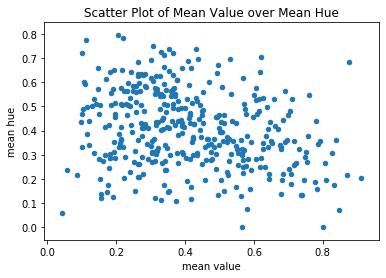

In [31]:
horror_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

# Display Results For Romance movies


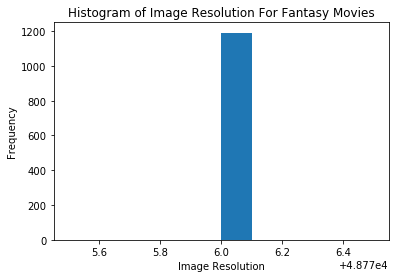

In [32]:
romance_stats['resolution'].plot(kind='hist')
plt.title('Histogram of Image Resolution For Fantasy Movies')
plt.xlabel('Image Resolution')
plt.show()

In [33]:
romance_stats['mean hue'].plot(kind='hist')
plt.title('Histogram of Mean Hue For Drama Movies')
plt.xlabel('Mean Hue')
plt.show()

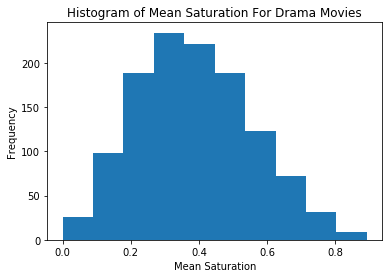

In [34]:
romance_stats['mean saturation'].plot(kind='hist')
plt.title('Histogram of Mean Saturation For Drama Movies')
plt.xlabel('Mean Saturation')
plt.show()

In [35]:
romance_stats['mean value'].plot(kind='hist')
plt.title('Histogram of Mean Value For Drama Movies')
plt.xlabel('Mean Value')
plt.show()

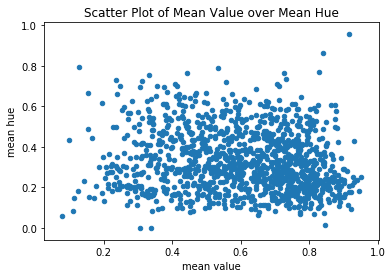

In [36]:
romance_stats.plot(kind='scatter', x='mean value', y='mean hue')
plt.title('Scatter Plot of Mean Value over Mean Hue')
plt.show()

In [37]:
def make_thumbnail(filename, imagepath, thumbnailpath):
    image = Image.open(imagepath+'/'+filename)
    size = 128, 128
    image.thumbnail(size)
    image.save(thumbnailpath+'/'+filename)

In [38]:
if not os.path.exists("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
    os.makedirs("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/")

In [39]:
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Romance/"):
    for imagename in image_list:
        make_thumbnail(imagename, "/home/pjuneja/DSC160/Project/data/posters/Romance/", "/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/")

In [40]:
if not os.path.exists("/home/pjuneja/DSC160/Project/data/posters/horror-thumbnails/"):
    os.makedirs("/home/pjuneja/DSC160/Project/data/posters/horror-thumbnails/")

In [41]:
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Horror/"):
    for imagename in image_list:
        make_thumbnail(imagename, "/home/pjuneja/DSC160/Project/data/posters/Horror/", "/home/pjuneja/DSC160/Project/data/posters/horror-thumbnails/")

In [42]:
if not os.path.exists('results'):
    os.makedirs('results')

In [43]:

stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/horror-thumbnails/"):
    for imagename in image_list:
        stat_list.append(calc_stats(path+'/'+imagename))
thumbs_horror_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

In [44]:
stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
    for imagename in image_list:
        try:
            stat_list.append(calc_stats(path+'/'+imagename))
        except:
            continue
thumbs_romance_stats = pd.DataFrame(stat_list, columns=['filename' ,'width', 'height', 'mean hue', 'mean saturation', 'mean value', 'resolution'])

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

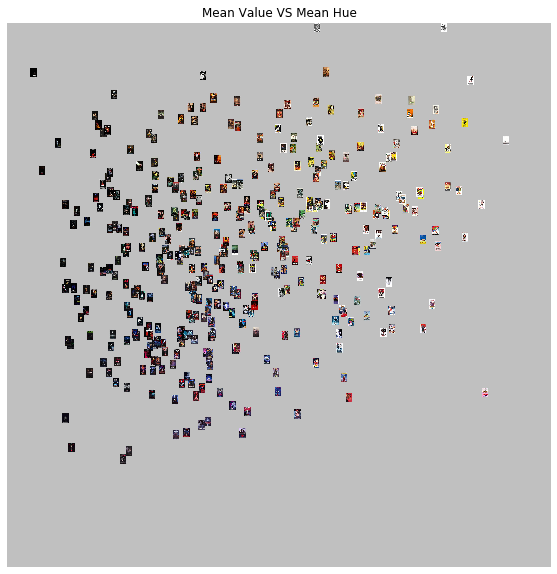

In [45]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_horror_stats[['mean value','mean hue']].values]
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/horror-thumbnails/"):
    for image_idx in range(len(image_list)):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/horror-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/horror-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")




In [46]:
# GLOBAL_WIDTH = 7500
# bg_color = (192, 192, 192) # gray, you can choose your own
# figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in romance_stats[['mean value','mean hue']].values]
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
#     for image_idx in range(len(image_list)):
#         thumb_img = Image.open(path+'/'+image_list[image_idx])
#         figure.paste(thumb_img, coords[image_idx])

# figure.save("results/romance-bitmap-value-vs-hue.jpg")
        
# image = plt.imread("results/romance-bitmap-value-vs-hue.jpg")

# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(image)
# ax.axis('off')  # clear x-axis and y-axis
# ax.set_title("Mean Value VS Mean Hue")
len(thumbs_romance_stats)

1191

In [47]:
# GLOBAL_WIDTH = 7500
# bg_color = (192, 192, 192) # gray, you can choose your own
# figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
# coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_romance_stats[['mean value','mean hue']].values]
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
#     for image_idx in range(1191):
#         thumb_img = Image.open(path+'/'+image_list[image_idx])
#         figure.paste(thumb_img, coords[image_idx])

# figure.save("results/romance-bitmap-value-vs-hue.jpg")
        
# image = plt.imread("results/romance-bitmap-value-vs-hue.jpg")

# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(image)
# ax.axis('off')  # clear x-axis and y-axis
# ax.set_title("Mean Value VS Mean Hue")

In [48]:
# GLOBAL_WIDTH = 7500
# bg_color = (192, 192, 192) # gray, you can choose your own
# figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

In [49]:
# coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in romance_stats[['mean value','mean hue']].values]

In [50]:
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
#     for image_idx in range(len(image_list)):
#         thumb_img = Image.open(path+'/'+image_list[image_idx])
#         figure.paste(thumb_img, coords[image_idx])


In [51]:
romance_stats

Unnamed: 0                                           filename  width  \
0              0  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1              1  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
2              2  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
3              3  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
4              4  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
...          ...                                                ...    ...   
1186        1186  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1187        1187  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1188        1188  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1189        1189  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1190        1190  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   

      height  mean hue  mean saturation  mean value  resolution  
0        268  0.537532         0.335918    0.512305       48776  
1        268  0.350826         0.382127    0.295262       48776  
2        268  0.236206         0.483106    0.801077       48776  
3        268  0.371260         0.399443    0.547597       48776  
4        268  0.332341         0.401230    0.785845       48776  
...      ...       ...              ...         ...         ...  
1186     268  0.697159         0.176942    0.306046       48776  
1187     268  0.122173         0.460974    0.532738       48776  
1188     268  0.295591         0.479474    0.659904       48776  
1189     268  0.147274         0.113575    0.171757       48776  
1190     268  0.168674         0.582658    0.536906       48776  

[1191 rows x 8 columns]

In [52]:
horror_stats

Unnamed: 0                                           filename  width  \
0             0  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
1             1  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
2             2  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
3             3  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
4             4  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
..          ...                                                ...    ...   
377         377  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
378         378  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
379         379  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
380         380  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
381         381  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   

     height  mean hue  mean saturation  mean value  resolution  
0       268  0.377509         0.477509    0.276005       48776  
1       268  0.452304         0.456966    0.336764       48776  
2       268  0.438806         0.305163    0.361807       48776  
3       268  0.603505         0.555272    0.307481       48776  
4       268  0.351795         0.580090    0.420821       48776  
..      ...       ...              ...         ...         ...  
377     268  0.439270         0.569900    0.120860       48776  
378     268  0.711361         0.567362    0.339690       48776  
379     268  0.269589         0.353684    0.755297       48776  
380     268  0.237068         0.667706    0.592119       48776  
381     268  0.601859         0.501100    0.470665       48776  

[382 rows x 8 columns]

In [53]:
idx = 0
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Romance"):
    print(image_list)
    for imagename in image_list:
        if idx!=118:
            make_thumbnail(imagename, "/home/pjuneja/DSC160/Project/data/posters/Romance", "/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/")
            idx+=1

['93104.jpg', '93565.jpg', '52902.jpg', '119494.jpg', '91680.jpg', '101640.jpg', '113026.jpg', '203009.jpg', '120723.jpg', '98575.jpg', '127349.jpg', '234853.jpg', '56860.jpg', '113849.jpg', '23876.jpg', '46250.jpg', '133363.jpg', '43278.jpg', '50306.jpg', '286179.jpg', '262826.jpg', '115886.jpg', '103859.jpg', '161977.jpg', '259711.jpg', '134948.jpg', '39416.jpg', '217107.jpg', '42895.jpg', '116684.jpg', '106471.jpg', '206963.jpg', '89853.jpg', '110146.jpg', '118798.jpg', '114089.jpg', '38300.jpg', '229340.jpg', '112883.jpg', '100530.jpg', '111622.jpg', '274428.jpg', '107002.jpg', '137386.jpg', '290212.jpg', '52357.jpg', '54022.jpg', '141986.jpg', '102175.jpg', '112427.jpg', '120834.jpg', '120780.jpg', '118044.jpg', '139462.jpg', '129923.jpg', '89208.jpg', '243655.jpg', '114210.jpg', '315543.jpg', '313196.jpg', '51658.jpg', '98384.jpg', '122541.jpg', '84116.jpg', '111507.jpg', '96200.jpg', '125971.jpg', '283111.jpg', '119250.jpg', '238588.jpg', '82146.jpg', '96978.jpg', '280590.jpg', 

Text(0.5, 1.0, 'Mean Value VS Mean Hue')

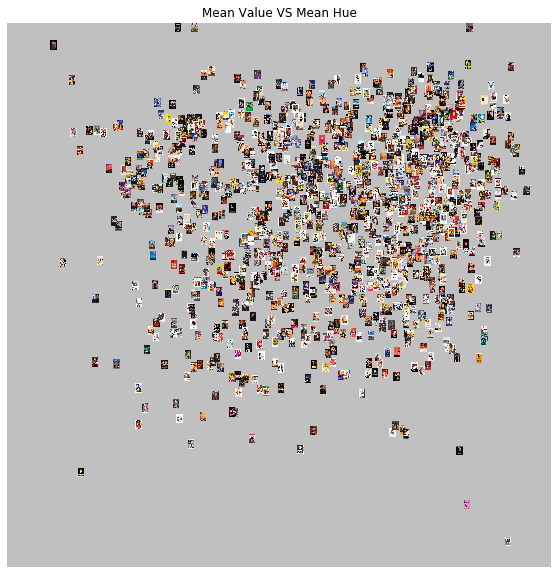

In [157]:
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)
coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in thumbs_romance_stats[['mean value','mean hue']].values]
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
    for image_idx in range(1191):
        thumb_img = Image.open(path+'/'+image_list[image_idx])
        figure.paste(thumb_img, coords[image_idx])

figure.save("results/romance-bitmap-value-vs-hue.jpg")
        
image = plt.imread("results/romance-bitmap-value-vs-hue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Mean Value VS Mean Hue")

Based on our bitmaps we can see that while there is no suitable conclusions that can be infered due to the fact that the images are so similar, because of issues regarding time period etc. However based on our analysis we can tell that lighter collours are used in more romance movies as there refer to a light movie overtone. We shall now conduct an edge and energy analysis on a couple posters, to see how they differ and also go on to check how they would fit in a KNN classifier model.

In [56]:
# coords = [(int(i[0]*GLOBAL_WIDTH),int(i[1]*GLOBAL_WIDTH)) for i in romance_stats[['mean value','mean hue']].values]

In [57]:
# count =0
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/romance-thumbnails/"):
#     if (count<=1191): 
#         for image_idx in range(1191):
#             count+=1
#             thumb_img = Image.open(path+'/'+image_list[image_idx])
# #for image_idx in range(len(image_list)):

In [58]:
romance_stats[['mean value','mean hue']].values

array([[0.51230507, 0.53753183],
       [0.29526246, 0.35082619],
       [0.80107719, 0.23620583],
       ...,
       [0.6599037 , 0.295591  ],
       [0.17175733, 0.14727383],
       [0.53690597, 0.16867397]])

# CLEANING DATA SET FOR CNN

In [59]:
#Lets start by getting all movie posters 

In [60]:
movies_df

imdbId                           Imdb Link  \
0      114709  http://www.imdb.com/title/tt114709   
1      113497  http://www.imdb.com/title/tt113497   
2      113228  http://www.imdb.com/title/tt113228   
3      114885  http://www.imdb.com/title/tt114885   
4      113041  http://www.imdb.com/title/tt113041   
...       ...                                 ...   
40103   83168   http://www.imdb.com/title/tt83168   
40104   82875   http://www.imdb.com/title/tt82875   
40105  815258  http://www.imdb.com/title/tt815258   
40106   79142   http://www.imdb.com/title/tt79142   
40107   70710   http://www.imdb.com/title/tt70710   

                                    Title  IMDB Score  \
0                        Toy Story (1995)         8.3   
1                          Jumanji (1995)         6.9   
2                 Grumpier Old Men (1995)         6.6   
3                Waiting to Exhale (1995)         5.7   
4      Father of the Bride Part II (1995)         5.9   
...                                   ...         ...   
40103               Tanya's Island (1980)         4.3   
40104               Pacific Banana (1981)         4.7   
40105  Werewolf in a Womens Prison (2006)         4.5   
40106              Xiao zi ming da (1979)         6.5   
40107                     Snatched (1973)         6.5   

                            Genre  \
0      Animation|Adventure|Comedy   
1         Action|Adventure|Family   
2                  Comedy|Romance   
3            Comedy|Drama|Romance   
4           Comedy|Family|Romance   
...                           ...   
40103                       Drama   
40104                      Comedy   
40105                      Horror   
40106               Action|Comedy   
40107        Crime|Drama|Thriller   

                                                  Poster  
0      https://images-na.ssl-images-amazon.com/images...  
1      https://images-na.ssl-images-amazon.com/images...  
2      https://images-na.ssl-images-amazon.com/images...  
3      https://images-na.ssl-images-amazon.com/images...  
4      https://images-na.ssl-images-amazon.com/images...  
...                                                  ...  
40103  https://images-na.ssl-images-amazon.com/images...  
40104  https://images-na.ssl-images-amazon.com/images...  
40105  https://images-na.ssl-images-amazon.com/images...  
40106  https://images-na.ssl-images-amazon.com/images...  
40107                                                NaN  

[40108 rows x 6 columns]

In [61]:
movies_df['imdb_link'] = ["https://www.imdb.com/title/"+str(x) for x in movies_df['imdbId']]

In [62]:
len(movies_df)

40108

In [63]:
movies_df_nan = movies_df.dropna(subset=['Genre','Poster'])

In [64]:
len(movies_df_nan)

39263

In [65]:
movies_df_nan.iloc[0]

imdbId                                                   114709
Imdb Link                    http://www.imdb.com/title/tt114709
Title                                          Toy Story (1995)
IMDB Score                                                  8.3
Genre                                Animation|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
imdb_link                     https://www.imdb.com/title/114709
Name: 0, dtype: object

In [66]:
movies_df_nan

imdbId                           Imdb Link  \
0      114709  http://www.imdb.com/title/tt114709   
1      113497  http://www.imdb.com/title/tt113497   
2      113228  http://www.imdb.com/title/tt113228   
3      114885  http://www.imdb.com/title/tt114885   
4      113041  http://www.imdb.com/title/tt113041   
...       ...                                 ...   
40102   83291   http://www.imdb.com/title/tt83291   
40103   83168   http://www.imdb.com/title/tt83168   
40104   82875   http://www.imdb.com/title/tt82875   
40105  815258  http://www.imdb.com/title/tt815258   
40106   79142   http://www.imdb.com/title/tt79142   

                                    Title  IMDB Score  \
0                        Toy Story (1995)         8.3   
1                          Jumanji (1995)         6.9   
2                 Grumpier Old Men (1995)         6.6   
3                Waiting to Exhale (1995)         5.7   
4      Father of the Bride Part II (1995)         5.9   
...                                   ...         ...   
40102               Los violadores (1981)         5.5   
40103               Tanya's Island (1980)         4.3   
40104               Pacific Banana (1981)         4.7   
40105  Werewolf in a Womens Prison (2006)         4.5   
40106              Xiao zi ming da (1979)         6.5   

                            Genre  \
0      Animation|Adventure|Comedy   
1         Action|Adventure|Family   
2                  Comedy|Romance   
3            Comedy|Drama|Romance   
4           Comedy|Family|Romance   
...                           ...   
40102             Action|Thriller   
40103                       Drama   
40104                      Comedy   
40105                      Horror   
40106               Action|Comedy   

                                                  Poster  \
0      https://images-na.ssl-images-amazon.com/images...   
1      https://images-na.ssl-images-amazon.com/images...   
2      https://images-na.ssl-images-amazon.com/images...   
3      https://images-na.ssl-images-amazon.com/images...   
4      https://images-na.ssl-images-amazon.com/images...   
...                                                  ...   
40102  https://images-na.ssl-images-amazon.com/images...   
40103  https://images-na.ssl-images-amazon.com/images...   
40104  https://images-na.ssl-images-amazon.com/images...   
40105  https://images-na.ssl-images-amazon.com/images...   
40106  https://images-na.ssl-images-amazon.com/images...   

                               imdb_link  
0      https://www.imdb.com/title/114709  
1      https://www.imdb.com/title/113497  
2      https://www.imdb.com/title/113228  
3      https://www.imdb.com/title/114885  
4      https://www.imdb.com/title/113041  
...                                  ...  
40102   https://www.imdb.com/title/83291  
40103   https://www.imdb.com/title/83168  
40104   https://www.imdb.com/title/82875  
40105  https://www.imdb.com/title/815258  
40106   https://www.imdb.com/title/79142  

[39263 rows x 7 columns]

In [67]:
def retrieve_poster(ids, urls, data_path, num_imgs):
    i = 0
    while len(os.listdir(data_path)) != num_imgs:
        try:
            urlretrieve(urls[i], data_path + str(ids[i]) + ".jpg")
        except Exception as e:
            pass
        i += 1

In [68]:
len(movies_df_nan)

39263

In [69]:
df= movies_df_nan.copy()

In [70]:
df_total = df[~df["Genre"].str.contains("Biography")]
#df_total = df[~df["Genre"].str.contains("Foreign")]

In [71]:
df_total = df_total[~df_total["Genre"].str.contains("TV Movie")]

In [72]:
df_total = df_total[~df_total["Genre"].str.contains("Family")]

In [73]:
len(df_total)

35250

In [74]:
df_total.Genre.value_counts()

Drama                            4205
Comedy                           2408
Documentary                      1559
Comedy|Drama                     1474
Drama|Romance                    1448
                                 ... 
Drama|Mystery|Crime                 1
Documentary|Adventure|Western       1
Comedy|Fantasy|Short                1
Film-Noir|Horror|Mystery            1
Crime|Film-Noir                     1
Name: Genre, Length: 1052, dtype: int64

In [75]:
movies_df_nan.head(50)

imdbId                           Imdb Link  \
0   114709  http://www.imdb.com/title/tt114709   
1   113497  http://www.imdb.com/title/tt113497   
2   113228  http://www.imdb.com/title/tt113228   
3   114885  http://www.imdb.com/title/tt114885   
4   113041  http://www.imdb.com/title/tt113041   
5   113277  http://www.imdb.com/title/tt113277   
6   114319  http://www.imdb.com/title/tt114319   
7   112302  http://www.imdb.com/title/tt112302   
8   114576  http://www.imdb.com/title/tt114576   
9   113189  http://www.imdb.com/title/tt113189   
10  112346  http://www.imdb.com/title/tt112346   
11  112896  http://www.imdb.com/title/tt112896   
12  112453  http://www.imdb.com/title/tt112453   
13  113987  http://www.imdb.com/title/tt113987   
14  112760  http://www.imdb.com/title/tt112760   
15  112641  http://www.imdb.com/title/tt112641   
16  114388  http://www.imdb.com/title/tt114388   
17  113101  http://www.imdb.com/title/tt113101   
18  112281  http://www.imdb.com/title/tt112281   
19  113845  http://www.imdb.com/title/tt113845   
20  113161  http://www.imdb.com/title/tt113161   
21  112722  http://www.imdb.com/title/tt112722   
22  112401  http://www.imdb.com/title/tt112401   
23  114168  http://www.imdb.com/title/tt114168   
24  113627  http://www.imdb.com/title/tt113627   
25  114057  http://www.imdb.com/title/tt114057   
26  114011  http://www.imdb.com/title/tt114011   
27  114117  http://www.imdb.com/title/tt114117   
28  112682  http://www.imdb.com/title/tt112682   
29  115012  http://www.imdb.com/title/tt115012   
30  112792  http://www.imdb.com/title/tt112792   
31  114746  http://www.imdb.com/title/tt114746   
32  114952  http://www.imdb.com/title/tt114952   
33  112431  http://www.imdb.com/title/tt112431   
34  112637  http://www.imdb.com/title/tt112637   
35  112818  http://www.imdb.com/title/tt112818   
36  112286  http://www.imdb.com/title/tt112286   
37  113442  http://www.imdb.com/title/tt113442   
38  112697  http://www.imdb.com/title/tt112697   
39  112749  http://www.imdb.com/title/tt112749   
40  114279  http://www.imdb.com/title/tt114279   
41  112819  http://www.imdb.com/title/tt112819   
42  114272  http://www.imdb.com/title/tt114272   
43  113855  http://www.imdb.com/title/tt113855   
44  114681  http://www.imdb.com/title/tt114681   
45  113347  http://www.imdb.com/title/tt113347   
46  114369  http://www.imdb.com/title/tt114369   
47  114148  http://www.imdb.com/title/tt114148   
48  114916  http://www.imdb.com/title/tt114916   
49  114814  http://www.imdb.com/title/tt114814   

                                    Title  IMDB Score  \
0                        Toy Story (1995)         8.3   
1                          Jumanji (1995)         6.9   
2                 Grumpier Old Men (1995)         6.6   
3                Waiting to Exhale (1995)         5.7   
4      Father of the Bride Part II (1995)         5.9   
5                             Heat (1995)         8.2   
6                          Sabrina (1995)         6.3   
7                     Tom and Huck (1995)         5.6   
8                     Sudden Death (1995)         5.7   
9                        GoldenEye (1995)         7.2   
10          The American President (1995)         6.8   
11     Dracula: Dead and Loving It (1995)         5.8   
12                           Balto (1995)         7.1   
13                           Nixon (1995)         7.1   
14                Cutthroat Island (1995)         5.6   
15                          Casino (1995)         8.2   
16           Sense and Sensibility (1995)         7.7   
17                      Four Rooms (1995)         6.7   
18  Ace Ventura: When Nature Calls (1995)         6.3   
19                     Money Train (1995)         5.6   
20                      Get Shorty (1995)         6.9   
21                         Copycat (1995)         6.6   
22                       Assassins (1995)         6.3   
23                          Powder (1995)         6.5   
24               Leaving Las

In [76]:
df_tot = df_total.copy()
df_total = df_total.sample(frac=.1)
df_tot = pd.concat([df_total, df_tot]).drop_duplicates(keep=False)

In [77]:
label_dict = {"word2idx": {}, "idx2word": []}
idx = 0
genre_per_movie = df_total["Genre"].apply(lambda x: str(x).split("|")[:-1])
for l in [g for d in genre_per_movie for g in d]:
    if l in label_dict["idx2word"]:
        pass
    else:
        label_dict["idx2word"].append(l)
        label_dict["word2idx"][l] = idx
        idx += 1
n_classes = len(label_dict["idx2word"])

In [78]:
def genre_count(df, label_dict):
    max_genre = 0
    for label in label_dict["idx2word"]:
        occurrences = len((df[df['Genre'].str.contains(label)]))
        print(label, occurrences)
        if occurrences > max_genre:
            max_genre = occurrences
    return max_genre

In [79]:
max_genre = genre_count(df_total, label_dict)

Comedy 1103
Drama 1828
Action 472
Adventure 280
Crime 468
Horror 414
War 118
Sci-Fi 188
History 90
Documentary 305
Mystery 250
Animation 117
Short 75
Romance 596
Fantasy 166
Music 154
Film-Noir 40
Musical 70
Thriller 499
Western 67
Sport 62


In [80]:
len(df_tot)

30772

In [82]:
len(df_total)

3525

In [88]:
df_total.head()

imdbId                            Imdb Link  \
15969  1261945  http://www.imdb.com/title/tt1261945   
23210  2317524  http://www.imdb.com/title/tt2317524   
5439    268219   http://www.imdb.com/title/tt268219   
17424   238883   http://www.imdb.com/title/tt238883   
31737  2664258  http://www.imdb.com/title/tt2664258   

                               Title  IMDB Score                      Genre  \
15969      Sex and the City 2 (2010)         4.3       Comedy|Drama|Romance   
23210   12 Rounds 2: Reloaded (2013)         5.4  Action|Adventure|Thriller   
5439   How I Killed My Father (2001)         6.8             Drama|Thriller   
17424                  Brat 2 (2000)         7.9      Action|Crime|Thriller   
31737  Ummah - Unter Freunden (2013)         6.5               Comedy|Drama   

                                                  Poster  \
15969  https://images-na.ssl-images-amazon.com/images...   
23210  https://images-na.ssl-images-amazon.com/images...   
5439   https://images-na.ssl-images-amazon.com/images...   
17424  https://images-na.ssl-images-amazon.com/images...   
31737  https://images-na.ssl-images-amazon.com/images...   

                                imdb_link  
15969  https://www.imdb.com/title/1261945  
23210  https://www.imdb.com/title/2317524  
5439    https://www.imdb.com/title/268219  
17424   https://www.imdb.com/title/238883  
31737  https://www.imdb.com/title/2664258

In [91]:
df_movietotal = df_total[['Genre', 'imdbId', 'Title']]

In [92]:
df_movietotal[df_movietotal["imdbId"].values == 404364]

Empty DataFrame
Columns: [Genre, imdbId, Title]
Index: []

In [107]:
# y = np.asarray([np.asarray(row, dtype=float) for row in y], dtype=float)

In [108]:
# y_arr = np.array(y)
# enc = OneHotEncoder(sparse=False) # Key here is sparse=False!
# y_categorical = enc.fit_transform(y_arr.reshape((y_arr.shape[0]),1))

In [109]:
# input_shape = dataset[0].shape
# input_shape

In [110]:
# ty = np.array(dataset[: n])

In [111]:
# print(ty.shape)

In [112]:
# tx = np.array(y[: n])

In [113]:
# print(tx.shape)

In [114]:
# a= np.reshape(ty,(4000,450,101))

Here is how the images stacked in an edge and energy analysis. Based on our graphs and our analysis from above We can tell the genres apart.

In [115]:
beckpaint = []
for infile in glob.glob("/home/pjuneja/DSC160/Project/data/posters/Romance/*.jpg"):
    print(infile)
    beckpaint.append(infile)

/home/pjuneja/DSC160/Project/data/posters/Romance/93104.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/93565.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/52902.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/119494.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/91680.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/101640.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/113026.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/203009.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/120723.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/98575.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/127349.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/234853.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/56860.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/113849.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/23876.jpg
/home/pjuneja/DSC160/Project/data/posters/Romance/46250.jpg
/home/pjuneja/DSC160/Project/dat

In [116]:
for i in beckpaint:
    if '114825' in i:
        print(i)

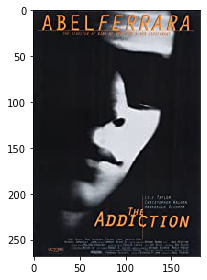

In [117]:
horror_add = io.imread("/home/pjuneja/DSC160/Project/data/posters/Horror/112288.jpg")
io.imshow(horror_add)

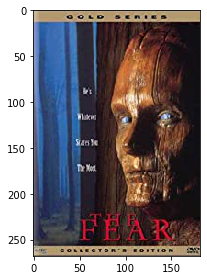

In [118]:
horror_fear = io.imread("/home/pjuneja/DSC160/Project/data/posters/Horror/113043.jpg")
io.imshow(horror_fear)

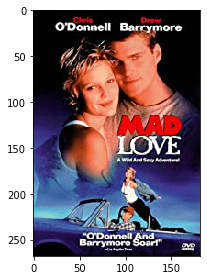

In [119]:
romance_old=io.imread("/home/pjuneja/DSC160/Project/data/posters/Romance/113729.jpg")
io.imshow(romance_old)

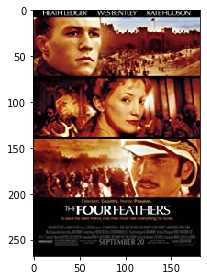

In [120]:
romance_new=io.imread("/home/pjuneja/DSC160/Project/data/posters/Romance/240510.jpg")
io.imshow(romance_new)

In [121]:
rgb_img = horror_add
hsv_img = rgb2hsv(rgb_img)

In [122]:
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:,:, 1]
value_img = hsv_img[:, :, 2]

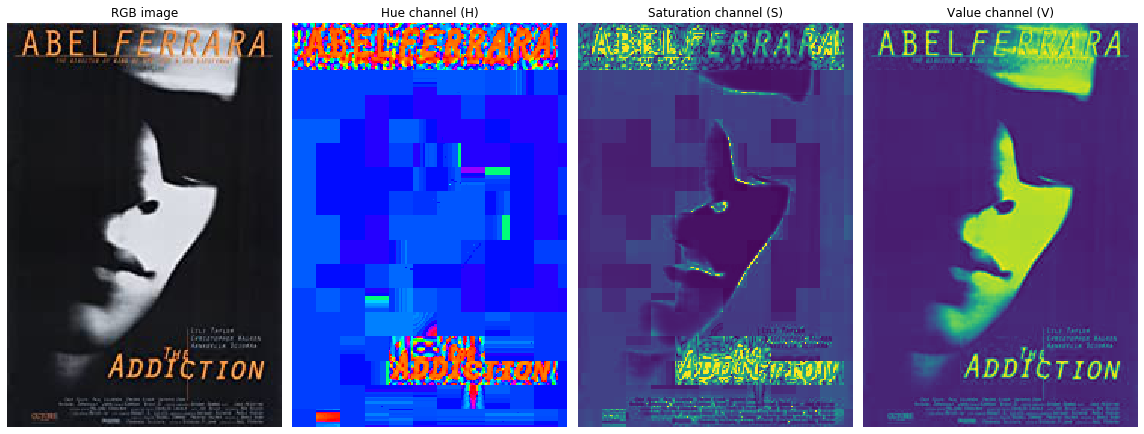

In [123]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel (H)")
ax1.axis('off')
ax2.imshow(saturation_img)
ax2.set_title("Saturation channel (S)")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel (V)")
ax3.axis('off')

fig.tight_layout()

In [124]:
#returns mean hsv values and image hsv images

def observations(image):
    rgb_img = image
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

    ax0.imshow(rgb_img)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel (H)")
    ax1.axis('off')
    ax2.imshow(saturation_img)
    ax2.set_title("Saturation channel (S)")
    ax2.axis('off')
    ax3.imshow(value_img)
    ax3.set_title("Value channel (V)")
    ax3.axis('off')
    mean_hue = np.mean(hue_img, axis=(0,1))
    mean_saturation = np.mean(saturation_img, axis=(0,1))
    mean_brightness = np.mean(value_img)
    vals = [mean_hue,mean_saturation,mean_brightness]
    fig.tight_layout()

    return vals
    
    

[0.5988031739741085, 0.21145677873595764, 0.235128735765259]

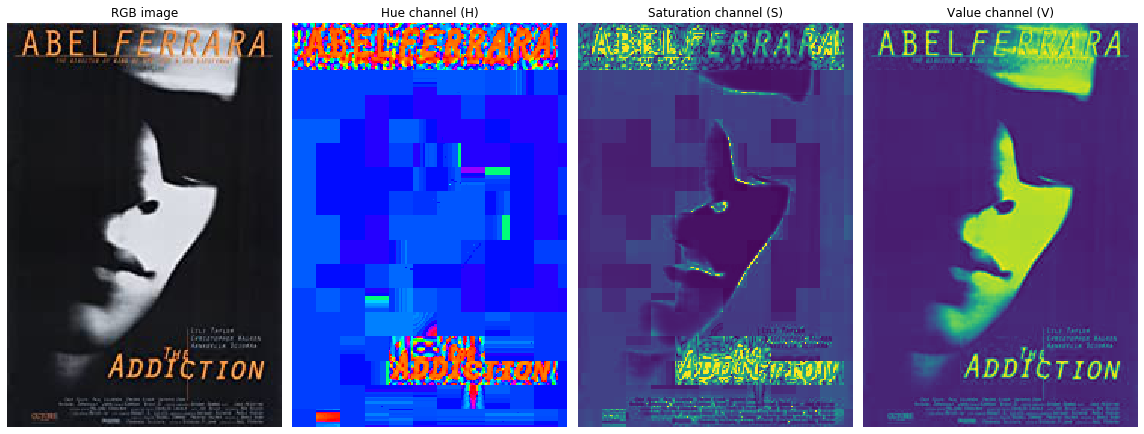

In [125]:

observations(horror_add)

[0.4387953235195109, 0.4805283976432152, 0.37969348474177267]

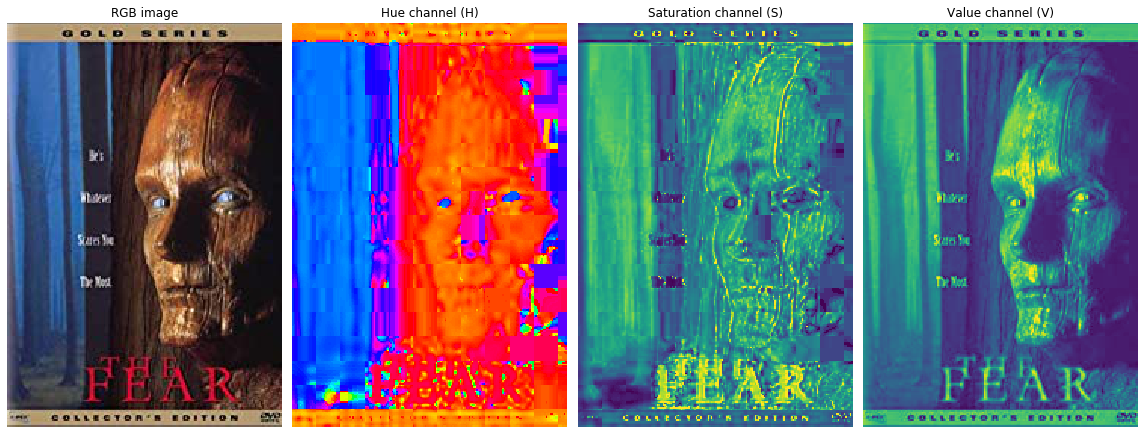

In [126]:
observations(horror_fear)

In [127]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray

In [128]:
def calc_entropy(image):
    img = image
    gray_img = rgb2gray(img)
    entr_img = entropy(gray_img, disk(10))

    ax = io.imshow(entr_img)
    

In [129]:
def calcDGenergy(img):
    # from from https://stackoverflow.com/a/48974892

    #convert from uint8 to int64 to prevent overflow problems
    arr = np.array(img, dtype = int)

    #calculate squared difference ((x-1, y) - (x+1, y))^2 for each R, G and B pixel
    deltaX2 = np.square(np.roll(arr, -1, axis = 0) - np.roll(arr, 1, axis = 0))

    #same for y axis
    deltaY2 = np.square(np.roll(arr, -1, axis = 1) - np.roll(arr, 1, axis = 1))

    #add R, G and B values for each pixel, then add x- and y-shifted values
    dualEnergy = np.sum(deltaX2, axis = 2) + np.sum(deltaY2, axis = 2)
    return dualEnergy

/opt/conda/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


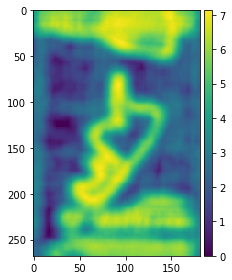

In [130]:
calc_entropy(horror_add)

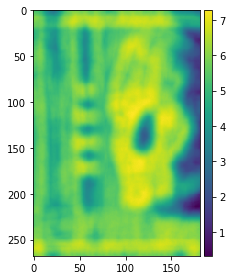

In [131]:
calc_entropy(horror_fear)

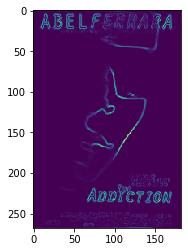

min:  0
max:  208053
mean:  5009.321797605379


In [132]:
dgEnergy = calcDGenergy(horror_add)
plt.imshow(dgEnergy)
plt.show()

print("min: ", dgEnergy.min())
print("max: ", dgEnergy.max())
print("mean: ", dgEnergy.mean())

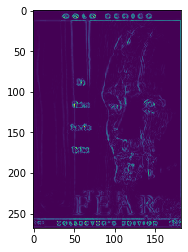

min:  0
max:  174882
mean:  5270.924430047565


In [133]:
dgEnergy = calcDGenergy(horror_fear)
plt.imshow(dgEnergy)
plt.show()

print("min: ", dgEnergy.min())
print("max: ", dgEnergy.max())
print("mean: ", dgEnergy.mean())

In [134]:
from scipy import ndimage
import scipy.misc
from skimage import data, io
from skimage.color import rgb2hsv

import matplotlib.pyplot as plt
import numpy as np

In [135]:
def calc_edge(image):
    rgb_img = image
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    sobel_x = ndimage.sobel(value_img, axis=1, mode='constant')
    sobel_y = ndimage.sobel(value_img, axis=0, mode='constant')
    landscape_edge_image = np.hypot(sobel_x, sobel_y)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

    ax0.imshow(image)
    ax0.set_title("Painting")
    ax0.axis('off')
    ax1.imshow(landscape_edge_image, cmap='gray')
    ax1.set_title("Edge (Magnitude of X-Y Sobel)")
    ax1.axis('off')
    ax2.imshow(sobel_x, cmap='gray')
    ax2.set_title("X Sobel")
    ax2.axis('off')
    ax3.imshow(sobel_y, cmap='gray')
    ax3.set_title("Y Sobel")
    ax3.axis('off')
    print("mean of edge_image (edginess):", landscape_edge_image.mean())
    return fig.tight_layout()

# print stats

    

mean of edge_image (edginess): 0.44407514323123715


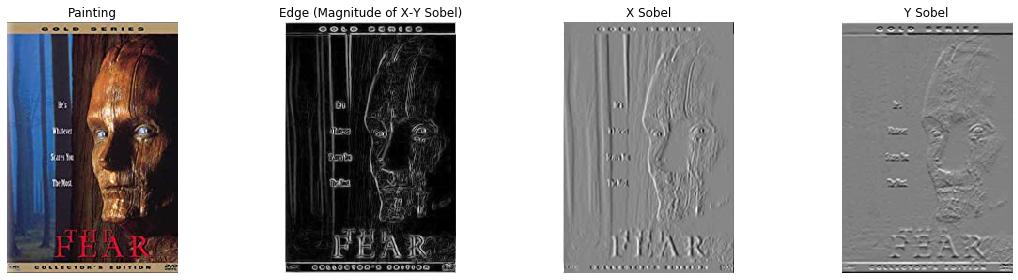

In [136]:
calc_edge(horror_fear)

mean of edge_image (edginess): 0.28520897032473935


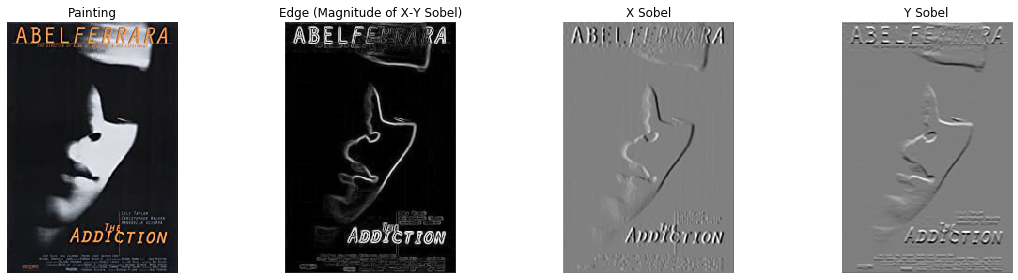

In [137]:
calc_edge(horror_add)

In [138]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [139]:
from skimage import io
from scipy import ndimage
from skimage.color import rgb2hsv
import skimage
%matplotlib inline
#We theorised that horror movies would have lesser faces and if face detection was a possibility for this analysis

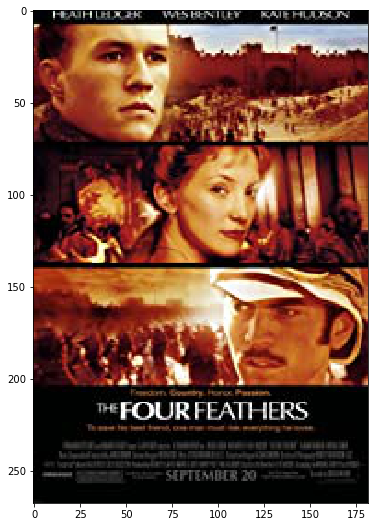

In [140]:
portrait = romance_new
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(portrait)

In [141]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

portrait_cv = cv2.cvtColor(portrait, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2GRAY)

In [142]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    portrait_cv = cv2.rectangle(portrait_cv,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = portrait_cv[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

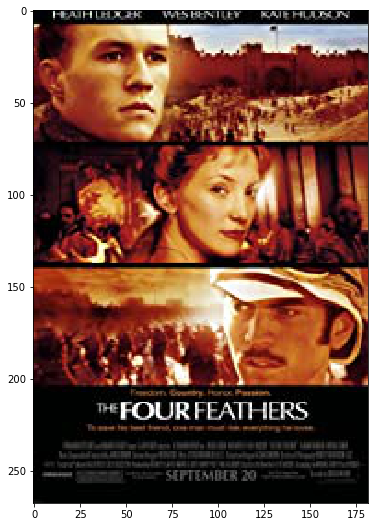

In [143]:
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2RGB))

In [144]:
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    portrait_cv = cv2.rectangle(portrait_cv,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = portrait_cv[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    smiles = smile_cascade.detectMultiScale(roi_gray)
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)
        

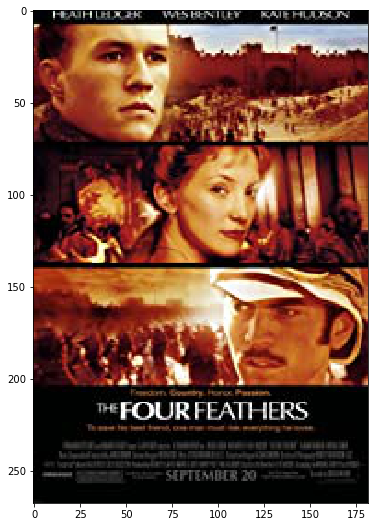

In [145]:
fig1 = plt.figure(figsize=(6, 12))
ax = plt.imshow(cv2.cvtColor(portrait_cv, cv2.COLOR_BGR2RGB))

[0.3713644348293654, 0.5260219140706093, 0.45214296970223217]

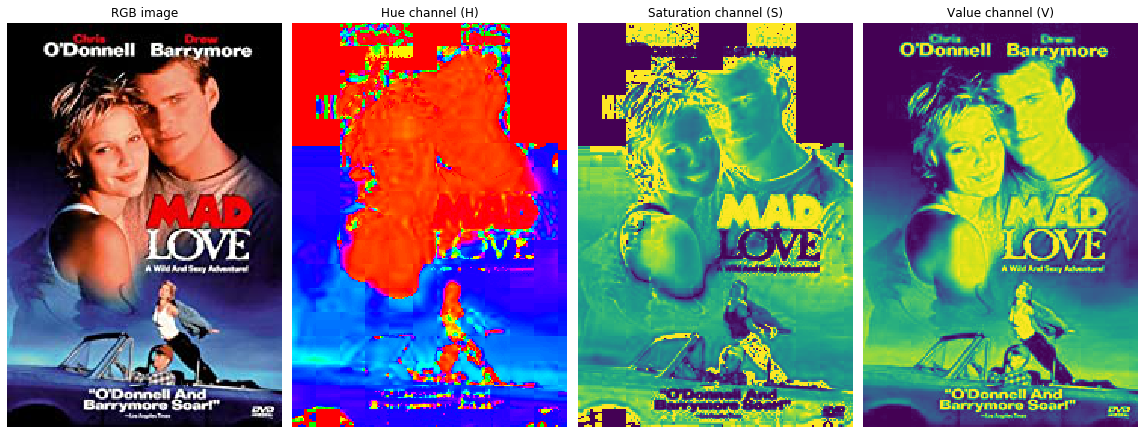

In [146]:
observations(romance_old)

[0.3713644348293654, 0.5260219140706093, 0.45214296970223217]

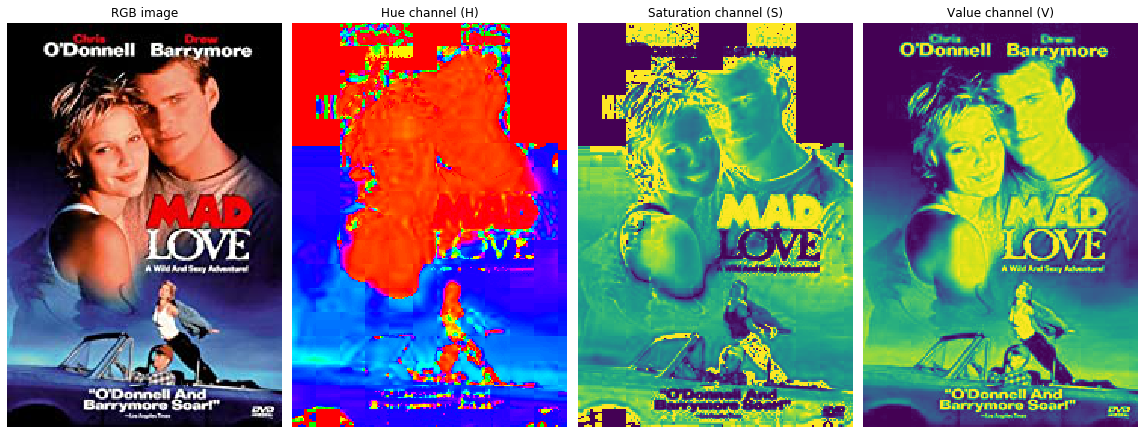

In [147]:
observations(romance_old)

mean of edge_image (edginess): 0.6454604361089913


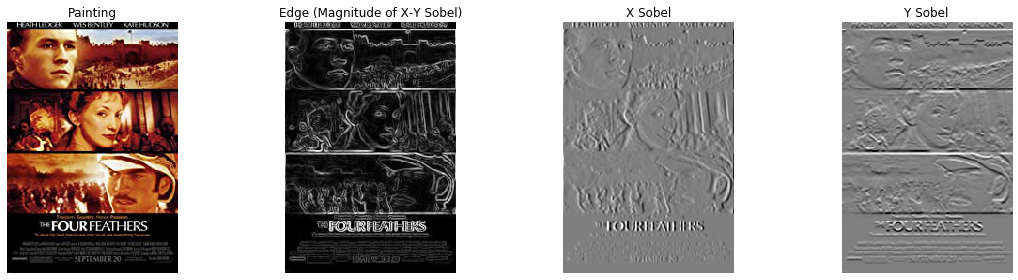

In [148]:
calc_edge(romance_new)

mean of edge_image (edginess): 0.5498656385869473


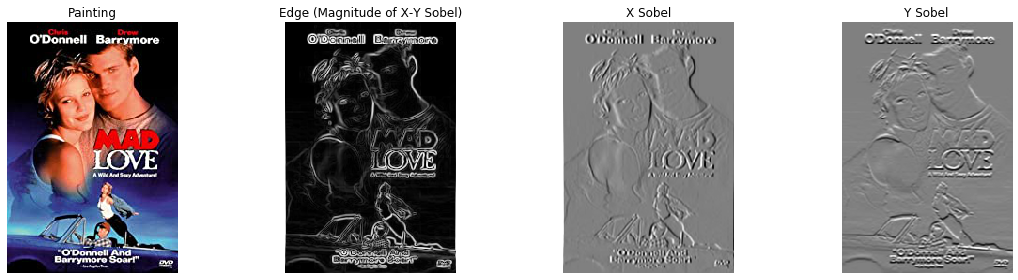

In [149]:
calc_edge(romance_old)

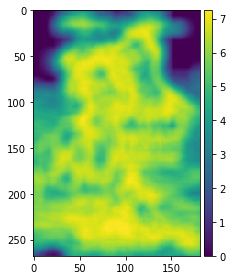

In [150]:
calc_entropy(romance_old)

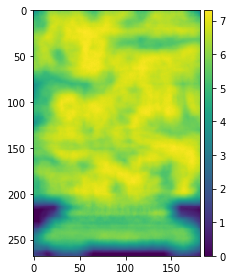

In [151]:
calc_entropy(romance_new)

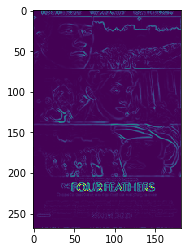

min:  0
max:  370336
mean:  11922.416352304412


In [152]:

dgEnergy = calcDGenergy(romance_new)
plt.imshow(dgEnergy)
plt.show()

print("min: ", dgEnergy.min())
print("max: ", dgEnergy.max())
print("mean: ", dgEnergy.mean())

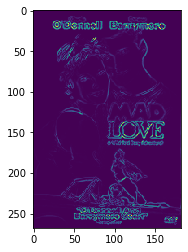

min:  0
max:  381078
mean:  13914.832171559783


In [153]:
dgEnergy = calcDGenergy(romance_old)
plt.imshow(dgEnergy)
plt.show()

print("min: ", dgEnergy.min())
print("max: ", dgEnergy.max())
print("mean: ", dgEnergy.mean())

In [154]:
horror_stats

Unnamed: 0                                           filename  width  \
0             0  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
1             1  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
2             2  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
3             3  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
4             4  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
..          ...                                                ...    ...   
377         377  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
378         378  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
379         379  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
380         380  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
381         381  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   

     height  mean hue  mean saturation  mean value  resolution  
0       268  0.377509         0.477509    0.276005       48776  
1       268  0.452304         0.456966    0.336764       48776  
2       268  0.438806         0.305163    0.361807       48776  
3       268  0.603505         0.555272    0.307481       48776  
4       268  0.351795         0.580090    0.420821       48776  
..      ...       ...              ...         ...         ...  
377     268  0.439270         0.569900    0.120860       48776  
378     268  0.711361         0.567362    0.339690       48776  
379     268  0.269589         0.353684    0.755297       48776  
380     268  0.237068         0.667706    0.592119       48776  
381     268  0.601859         0.501100    0.470665       48776  

[382 rows x 8 columns]

In [155]:
len(movies_df_nan)

39263

# Clean DATA and Process for KNN

In [158]:
# len(df_r)

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [159]:
horror_stats# adding entorpy

Unnamed: 0                                           filename  width  \
0             0  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
1             1  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
2             2  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
3             3  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
4             4  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
..          ...                                                ...    ...   
377         377  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
378         378  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
379         379  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
380         380  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   
381         381  /home/pjuneja/DSC160/Project/data/posters/Horr...    182   

     height  mean hue  mean saturation  mean value  resolution  
0       268  0.377509         0.477509    0.276005       48776  
1       268  0.452304         0.456966    0.336764       48776  
2       268  0.438806         0.305163    0.361807       48776  
3       268  0.603505         0.555272    0.307481       48776  
4       268  0.351795         0.580090    0.420821       48776  
..      ...       ...              ...         ...         ...  
377     268  0.439270         0.569900    0.120860       48776  
378     268  0.711361         0.567362    0.339690       48776  
379     268  0.269589         0.353684    0.755297       48776  
380     268  0.237068         0.667706    0.592119       48776  
381     268  0.601859         0.501100    0.470665       48776  

[382 rows x 8 columns]

In [160]:
# for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Horror/"):
#     for imagename in image_list:
#         print(io.imread(path+'/'+imagename))

In [161]:
def calc_edge(image):
    rgb_img = image
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    sobel_x = ndimage.sobel(value_img, axis=1, mode='constant')
    sobel_y = ndimage.sobel(value_img, axis=0, mode='constant')
    landscape_edge_image = np.hypot(sobel_x, sobel_y)
#     fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

#     ax0.imshow(image)
#     ax0.set_title("Painting")
#     ax0.axis('off')
#     ax1.imshow(landscape_edge_image, cmap='gray')
#     ax1.set_title("Edge (Magnitude of X-Y Sobel)")
#     ax1.axis('off')
#     ax2.imshow(sobel_x, cmap='gray')
#     ax2.set_title("X Sobel")
#     ax2.axis('off')
#     ax3.imshow(sobel_y, cmap='gray')
#     ax3.set_title("Y Sobel")
#     ax3.axis('off')
    return landscape_edge_image.mean()
    #return fig.tight_layout()


In [162]:
stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Horror/"):
    for imagename in image_list:
        try:
            stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
        except:
            continue

In [163]:
horror_stats['edge'] = stat_list

In [165]:
#horror_stats = horror_stats.drop(['entropy'],axis=1)

In [166]:
def image_energy(image):
    dgEnergy = calcDGenergy(image)
    mean = dgEnergy.mean()
    return mean



In [167]:
image_energy(romance_new)

11922.416352304412

In [168]:
stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Horror/"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            continue
            
horror_stats['Energy'] = stat_list

In [169]:
stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Romance/"):
    for imagename in image_list:
        try:
            stat_list.append(calc_edge(io.imread(path+'/'+imagename)))
        except:
            continue
romance_stats['edge'] = stat_list

In [170]:
stat_list = []
for path, idk, image_list in os.walk("/home/pjuneja/DSC160/Project/data/posters/Romance/"):
    for imagename in image_list:
        try:
            stat_list.append(image_energy(io.imread(path+'/'+imagename)))
        except:
            continue
            
romance_stats['Energy'] = stat_list

In [171]:
romance_stats

Unnamed: 0                                           filename  width  \
0              0  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1              1  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
2              2  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
3              3  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
4              4  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
...          ...                                                ...    ...   
1186        1186  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1187        1187  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1188        1188  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1189        1189  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   
1190        1190  /home/pjuneja/DSC160/Project/data/posters/Roma...    182   

      height  mean hue  mean saturation  mean value  resolution      edge  \
0        268  0.537532         0.335918    0.512305       48776  0.711458   
1        268  0.350826         0.382127    0.295262       48776  0.398352   
2        268  0.236206         0.483106    0.801077       48776  0.745783   
3        268  0.371260         0.399443    0.547597       48776  0.570789   
4        268  0.332341         0.401230    0.785845       48776  0.418399   
...      ...       ...              ...         ...         ...       ...   
1186     268  0.697159         0.176942    0.306046       48776  0.346376   
1187     268  0.122173         0.460974    0.532738       48776  0.546745   
1188     268  0.295591         0.479474    0.659904       48776  0.620597   
1189     268  0.147274         0.113575    0.171757       48776  0.162106   
1190     268  0.168674         0.582658    0.536906       48776  0.520003   

            Energy  
0     19704.139085  
1     11475.207848  
2     24522.983065  
3     11866.680950  
4      7504.432426  
...            ...  
1186   5778.772019  
1187  11913.165983  
1188  13884.381909  
1189   2356.005536  
1190  11735.613744  

[1191 rows x 10 columns]

In [264]:
df = horror_stats
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [265]:
df_r = romance_stats
df_r = df_r.loc[:, ~df_r.columns.str.contains('^Unnamed')]


In [266]:
df_both = df.append(df_r)

In [267]:
len(df_both)

1573

In [268]:
df_both['y']= df_both.filename.str.contains('Romance')

In [269]:
df_both['y'] = df_both["y"].astype(int)
df_both

filename  width  height  \
0     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
1     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
2     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
3     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
4     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
...                                                 ...    ...     ...   
1186  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1187  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1188  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1189  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1190  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   

      mean hue  mean saturation  mean value  resolution      edge  \
0     0.377509         0.477509    0.276005       48776  0.740893   
1     0.452304         0.456966    0.336764       48776  0.494741   
2     0.438806         0.305163    0.361807       48776  0.417564   
3     0.603505         0.555272    0.307481       48776  0.608633   
4     0.351795         0.580090    0.420821       48776  1.012650   
...        ...              ...         ...         ...       ...   
1186  0.697159         0.176942    0.306046       48776  0.346376   
1187  0.122173         0.460974    0.532738       48776  0.546745   
1188  0.295591         0.479474    0.659904       48776  0.620597   
1189  0.147274         0.113575    0.171757       48776  0.162106   
1190  0.168674         0.582658    0.536906       48776  0.520003   

            Energy  y  
0     14473.037436  0  
1      8642.372273  0  
2      5676.363252  0  
3     14365.622396  0  
4     29695.661678  0  
...            ... ..  
1186   5778.772019  1  
1187  11913.165983  1  
1188  13884.381909  1  
1189   2356.005536  1  
1190  11735.613744  1  

[1573 rows x 10 columns]

In [270]:
df_both

filename  width  height  \
0     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
1     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
2     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
3     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
4     /home/pjuneja/DSC160/Project/data/posters/Horr...    182     268   
...                                                 ...    ...     ...   
1186  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1187  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1188  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1189  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   
1190  /home/pjuneja/DSC160/Project/data/posters/Roma...    182     268   

      mean hue  mean saturation  mean value  resolution      edge  \
0     0.377509         0.477509    0.276005       48776  0.740893   
1     0.452304         0.456966    0.336764       48776  0.494741   
2     0.438806         0.305163    0.361807       48776  0.417564   
3     0.603505         0.555272    0.307481       48776  0.608633   
4     0.351795         0.580090    0.420821       48776  1.012650   
...        ...              ...         ...         ...       ...   
1186  0.697159         0.176942    0.306046       48776  0.346376   
1187  0.122173         0.460974    0.532738       48776  0.546745   
1188  0.295591         0.479474    0.659904       48776  0.620597   
1189  0.147274         0.113575    0.171757       48776  0.162106   
1190  0.168674         0.582658    0.536906       48776  0.520003   

            Energy  y  
0     14473.037436  0  
1      8642.372273  0  
2      5676.363252  0  
3     14365.622396  0  
4     29695.661678  0  
...            ... ..  
1186   5778.772019  1  
1187  11913.165983  1  
1188  13884.381909  1  
1189   2356.005536  1  
1190  11735.613744  1  

[1573 rows x 10 columns]

In [271]:
df_both = df_both.drop(['filename','width','height','resolution'], axis = 1)

In [272]:
df = df_both.copy()

In [181]:
df = df.sample(frac=1)

In [182]:
len(df)

1573

In [183]:
df.columns

Index(['mean hue', 'mean saturation', 'mean value', 'edge', 'Energy', 'y'], dtype='object')

In [184]:
X = df[['mean hue', 'mean saturation',
       'mean value','Energy','edge']]



In [185]:
y = df['y']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
len(X_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
#y_pred

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

In [ ]:
neigh.predict(X_test)


In [ ]:
neigh.score(X_test,y_test)

In [ ]:
neigh.score(X_train,y_train)

In [ ]:
def calcDGenergy(img):
    # from from https://stackoverflow.com/a/48974892

    #convert from uint8 to int64 to prevent overflow problems
    arr = np.array(img, dtype = int)

    #calculate squared difference ((x-1, y) - (x+1, y))^2 for each R, G and B pixel
    deltaX2 = np.square(np.roll(arr, -1, axis = 0) - np.roll(arr, 1, axis = 0))

    #same for y axis
    deltaY2 = np.square(np.roll(arr, -1, axis = 1) - np.roll(arr, 1, axis = 1))

    #add R, G and B values for each pixel, then add x- and y-shifted values
    dualEnergy = np.sum(deltaX2, axis = 2) + np.sum(deltaY2, axis = 2)
    return dualEnergy

In [ ]:
def image_energy(image):
    dgEnergy = calcDGenergy(image)
    mean = dgEnergy.mean()
    return mean


In [273]:
doc_scifi= pd.read_csv('doc_scifi_df.csv')
# doc_scifi.rename(columns={"energy": "Energy"})

In [274]:
doc_fant = pd.read_csv('fantasy_drama_df.csv')

In [248]:
doc_scifi

Unnamed: 0  height  width  hue_mean  saturation_mean  value_mean  \
0      478338.jpg   182.0  268.0  0.306147         0.723868    0.362230   
1      389448.jpg   182.0  268.0  0.342670         0.169573    0.783071   
2     4537412.jpg   182.0  268.0  0.533187         0.413989    0.439530   
3      470994.jpg   182.0  268.0  0.491463         0.624723    0.500228   
4     3103318.jpg   182.0  268.0  0.513776         0.028905    0.707325   
...           ...     ...    ...       ...              ...         ...   
5195    53344.jpg   182.0  268.0  0.203640         0.264812    0.740592   
5196    84099.jpg   182.0  268.0  0.373785         0.238152    0.787670   
5197    50251.jpg   182.0  268.0  0.233258         0.474582    0.355757   
5198    50280.jpg   182.0  268.0  0.395068         0.350533    0.501975   
5199   115006.jpg   182.0  268.0  0.250771         0.727069    0.243392   

          edge        energy  y  
0     1.003007  28932.385312  4  
1     0.565414  19715.012260  4  
2     0.331862   6836.326923  4  
3     0.664191  14745.765868  4  
4     0.133570   1083.797113  4  
...        ...           ... ..  
5195  0.546375  13072.789364  5  
5196  0.542064  13251.339839  5  
5197  0.751023  18639.478965  5  
5198  0.694214  16691.405527  5  
5199  0.490408   8758.760087  5  

[5200 rows x 9 columns]

In [276]:
doc_fant

Unnamed: 0                           filename  width  height  mean hue  \
0              0  ./data/posters/fantasy/109356.jpg    182     268  0.539367   
1              1  ./data/posters/fantasy/110527.jpg    182     268  0.618039   
2              2  ./data/posters/fantasy/110148.jpg    182     268  0.114299   
3              3   ./data/posters/fantasy/82198.jpg    182     268  0.320213   
4              4  ./data/posters/fantasy/119784.jpg    182     268  0.562902   
...          ...                                ...    ...     ...       ...   
2108        1990    ./data/posters/drama/116488.jpg    182     268  0.276406   
2109        1991     ./data/posters/drama/43278.jpg    182     268  0.243110   
2110        1992    ./data/posters/drama/119988.jpg    182     268  0.497657   
2111        1993    ./data/posters/drama/106918.jpg    182     268  0.629654   
2112        1994    ./data/posters/drama/120631.jpg    182     268  0.339728   

      mean saturation  mean value      edge        energy  y  
0            0.522402    0.380489  0.588885  11122.573766  2  
1            0.372522    0.416437  0.299823   4651.511030  2  
2            0.524769    0.330444  0.364130   6597.940750  2  
3            0.412915    0.214963  0.578825  15754.543751  2  
4            0.606115    0.268397  0.568992   9604.701534  2  
...               ...         ...       ...           ... ..  
2108         0.461814    0.397319  0.905542  23369.151263  3  
2109         0.199085    0.855048  0.566672  16295.654830  3  
2110         0.573446    0.477370  0.650948   9546.533705  3  
2111         0.224117    0.414035  0.373866   9224.208094  3  
2112         0.463561    0.514842  0.406994   5244.713261  3  

[2113 rows x 10 columns]

In [275]:
df_both

mean hue  mean saturation  mean value      edge        Energy  y
0     0.377509         0.477509    0.276005  0.740893  14473.037436  0
1     0.452304         0.456966    0.336764  0.494741   8642.372273  0
2     0.438806         0.305163    0.361807  0.417564   5676.363252  0
3     0.603505         0.555272    0.307481  0.608633  14365.622396  0
4     0.351795         0.580090    0.420821  1.012650  29695.661678  0
...        ...              ...         ...       ...           ... ..
1186  0.697159         0.176942    0.306046  0.346376   5778.772019  1
1187  0.122173         0.460974    0.532738  0.546745  11913.165983  1
1188  0.295591         0.479474    0.659904  0.620597  13884.381909  1
1189  0.147274         0.113575    0.171757  0.162106   2356.005536  1
1190  0.168674         0.582658    0.536906  0.520003  11735.613744  1

[1573 rows x 6 columns]

In [277]:
doc_fant = doc_fant.loc[:, ~doc_fant.columns.str.contains('^Unnamed')]


In [278]:
doc_scifi= doc_scifi.loc[:, ~doc_scifi.columns.str.contains('^Unnamed')]

In [279]:
doc_fant = doc_fant.drop(['filename','width','height'],axis = 1)

In [280]:
doc_scifi = doc_scifi.drop(['width','height'],axis = 1)

In [281]:
doc_scifi

hue_mean  saturation_mean  value_mean      edge        energy  y
0     0.306147         0.723868    0.362230  1.003007  28932.385312  4
1     0.342670         0.169573    0.783071  0.565414  19715.012260  4
2     0.533187         0.413989    0.439530  0.331862   6836.326923  4
3     0.491463         0.624723    0.500228  0.664191  14745.765868  4
4     0.513776         0.028905    0.707325  0.133570   1083.797113  4
...        ...              ...         ...       ...           ... ..
5195  0.203640         0.264812    0.740592  0.546375  13072.789364  5
5196  0.373785         0.238152    0.787670  0.542064  13251.339839  5
5197  0.233258         0.474582    0.355757  0.751023  18639.478965  5
5198  0.395068         0.350533    0.501975  0.694214  16691.405527  5
5199  0.250771         0.727069    0.243392  0.490408   8758.760087  5

[5200 rows x 6 columns]

In [284]:
doc_fant = doc_fant.rename(columns = {"energy":"Energy"})

In [285]:
doc_fant

mean hue  mean saturation  mean value      edge        Energy  y
0     0.539367         0.522402    0.380489  0.588885  11122.573766  2
1     0.618039         0.372522    0.416437  0.299823   4651.511030  2
2     0.114299         0.524769    0.330444  0.364130   6597.940750  2
3     0.320213         0.412915    0.214963  0.578825  15754.543751  2
4     0.562902         0.606115    0.268397  0.568992   9604.701534  2
...        ...              ...         ...       ...           ... ..
2108  0.276406         0.461814    0.397319  0.905542  23369.151263  3
2109  0.243110         0.199085    0.855048  0.566672  16295.654830  3
2110  0.497657         0.573446    0.477370  0.650948   9546.533705  3
2111  0.629654         0.224117    0.414035  0.373866   9224.208094  3
2112  0.339728         0.463561    0.514842  0.406994   5244.713261  3

[2113 rows x 6 columns]

In [287]:
doc_scifi

mean hue  mean saturation  mean value      edge        Energy  y
0      0.306147         0.723868    0.362230  1.003007  28932.385312  4
1      0.342670         0.169573    0.783071  0.565414  19715.012260  4
2      0.533187         0.413989    0.439530  0.331862   6836.326923  4
3      0.491463         0.624723    0.500228  0.664191  14745.765868  4
4      0.513776         0.028905    0.707325  0.133570   1083.797113  4
...         ...              ...         ...       ...           ... ..
5195   0.203640         0.264812    0.740592  0.546375  13072.789364  5
5196   0.373785         0.238152    0.787670  0.542064  13251.339839  5
5197   0.233258         0.474582    0.355757  0.751023  18639.478965  5
5198   0.395068         0.350533    0.501975  0.694214  16691.405527  5
5199   0.250771         0.727069    0.243392  0.490408   8758.760087  5

[5200 rows x 6 columns]

In [286]:
doc_scifi = doc_scifi.rename(columns={"energy": "Energy","hue_mean":" mean hue","saturation_mean":"mean saturation","value_mean":"mean value"})

In [288]:
df_both = df_both.append(doc_fant)

In [289]:
len(df_both)

3686

In [290]:
df_both = df_both.append(doc_scifi)

In [291]:
doc_scifi

mean hue  mean saturation  mean value      edge        Energy  y
0      0.306147         0.723868    0.362230  1.003007  28932.385312  4
1      0.342670         0.169573    0.783071  0.565414  19715.012260  4
2      0.533187         0.413989    0.439530  0.331862   6836.326923  4
3      0.491463         0.624723    0.500228  0.664191  14745.765868  4
4      0.513776         0.028905    0.707325  0.133570   1083.797113  4
...         ...              ...         ...       ...           ... ..
5195   0.203640         0.264812    0.740592  0.546375  13072.789364  5
5196   0.373785         0.238152    0.787670  0.542064  13251.339839  5
5197   0.233258         0.474582    0.355757  0.751023  18639.478965  5
5198   0.395068         0.350533    0.501975  0.694214  16691.405527  5
5199   0.250771         0.727069    0.243392  0.490408   8758.760087  5

[5200 rows x 6 columns]

In [293]:
df_both

mean hue  mean saturation  mean value      edge        Energy  y  \
0     0.377509         0.477509    0.276005  0.740893  14473.037436  0   
1     0.452304         0.456966    0.336764  0.494741   8642.372273  0   
2     0.438806         0.305163    0.361807  0.417564   5676.363252  0   
3     0.603505         0.555272    0.307481  0.608633  14365.622396  0   
4     0.351795         0.580090    0.420821  1.012650  29695.661678  0   
...        ...              ...         ...       ...           ... ..   
5195       NaN         0.264812    0.740592  0.546375  13072.789364  5   
5196       NaN         0.238152    0.787670  0.542064  13251.339839  5   
5197       NaN         0.474582    0.355757  0.751023  18639.478965  5   
5198       NaN         0.350533    0.501975  0.694214  16691.405527  5   
5199       NaN         0.727069    0.243392  0.490408   8758.760087  5   

       mean hue  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
5195   0.203640  
5196   0.373785  
5197   0.233258  
5198   0.395068  
5199   0.250771  

[8886 rows x 7 columns]

In [329]:
df_both = df.copy()

In [330]:
df_both = df_both.rename(columns = {"mean hue": "hue"})

In [331]:
df_both

hue  mean saturation  mean value      edge        Energy  y
0     0.377509         0.477509    0.276005  0.740893  14473.037436  0
1     0.452304         0.456966    0.336764  0.494741   8642.372273  0
2     0.438806         0.305163    0.361807  0.417564   5676.363252  0
3     0.603505         0.555272    0.307481  0.608633  14365.622396  0
4     0.351795         0.580090    0.420821  1.012650  29695.661678  0
...        ...              ...         ...       ...           ... ..
1186  0.697159         0.176942    0.306046  0.346376   5778.772019  1
1187  0.122173         0.460974    0.532738  0.546745  11913.165983  1
1188  0.295591         0.479474    0.659904  0.620597  13884.381909  1
1189  0.147274         0.113575    0.171757  0.162106   2356.005536  1
1190  0.168674         0.582658    0.536906  0.520003  11735.613744  1

[1573 rows x 6 columns]

In [313]:
doc_scifi = doc_scifi.rename(columns = {"mean hue": "hue"})

In [314]:
doc_scifi

mean hue  mean saturation  mean value      edge        Energy  y
0      0.306147         0.723868    0.362230  1.003007  28932.385312  4
1      0.342670         0.169573    0.783071  0.565414  19715.012260  4
2      0.533187         0.413989    0.439530  0.331862   6836.326923  4
3      0.491463         0.624723    0.500228  0.664191  14745.765868  4
4      0.513776         0.028905    0.707325  0.133570   1083.797113  4
...         ...              ...         ...       ...           ... ..
5195   0.203640         0.264812    0.740592  0.546375  13072.789364  5
5196   0.373785         0.238152    0.787670  0.542064  13251.339839  5
5197   0.233258         0.474582    0.355757  0.751023  18639.478965  5
5198   0.395068         0.350533    0.501975  0.694214  16691.405527  5
5199   0.250771         0.727069    0.243392  0.490408   8758.760087  5

[5200 rows x 6 columns]

In [303]:
doc_fant = doc_fant.rename(columns = {"mean hue": "hue"})

In [304]:
df_both = df_both.append(doc_scifi)

In [305]:
df_both

hue  mean saturation  mean value      edge        Energy  y  \
0     0.377509         0.477509    0.276005  0.740893  14473.037436  0   
1     0.452304         0.456966    0.336764  0.494741   8642.372273  0   
2     0.438806         0.305163    0.361807  0.417564   5676.363252  0   
3     0.603505         0.555272    0.307481  0.608633  14365.622396  0   
4     0.351795         0.580090    0.420821  1.012650  29695.661678  0   
...        ...              ...         ...       ...           ... ..   
5195       NaN         0.264812    0.740592  0.546375  13072.789364  5   
5196       NaN         0.238152    0.787670  0.542064  13251.339839  5   
5197       NaN         0.474582    0.355757  0.751023  18639.478965  5   
5198       NaN         0.350533    0.501975  0.694214  16691.405527  5   
5199       NaN         0.727069    0.243392  0.490408   8758.760087  5   

       mean hue  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
5195   0.203640  
5196   0.373785  
5197   0.233258  
5198   0.395068  
5199   0.250771  

[6773 rows x 7 columns]

In [326]:
doc_scifi = doc_scifi.rename(columns = {" mean hue": "hue"})

In [327]:
doc_scifi

hue  mean saturation  mean value      edge        Energy  y
0     0.306147         0.723868    0.362230  1.003007  28932.385312  4
1     0.342670         0.169573    0.783071  0.565414  19715.012260  4
2     0.533187         0.413989    0.439530  0.331862   6836.326923  4
3     0.491463         0.624723    0.500228  0.664191  14745.765868  4
4     0.513776         0.028905    0.707325  0.133570   1083.797113  4
...        ...              ...         ...       ...           ... ..
5195  0.203640         0.264812    0.740592  0.546375  13072.789364  5
5196  0.373785         0.238152    0.787670  0.542064  13251.339839  5
5197  0.233258         0.474582    0.355757  0.751023  18639.478965  5
5198  0.395068         0.350533    0.501975  0.694214  16691.405527  5
5199  0.250771         0.727069    0.243392  0.490408   8758.760087  5

[5200 rows x 6 columns]

In [338]:
df_both

hue  mean saturation  mean value      edge        Energy  y
0     0.377509         0.477509    0.276005  0.740893  14473.037436  0
1     0.452304         0.456966    0.336764  0.494741   8642.372273  0
2     0.438806         0.305163    0.361807  0.417564   5676.363252  0
3     0.603505         0.555272    0.307481  0.608633  14365.622396  0
4     0.351795         0.580090    0.420821  1.012650  29695.661678  0
...        ...              ...         ...       ...           ... ..
2108  0.276406         0.461814    0.397319  0.905542  23369.151263  3
2109  0.243110         0.199085    0.855048  0.566672  16295.654830  3
2110  0.497657         0.573446    0.477370  0.650948   9546.533705  3
2111  0.629654         0.224117    0.414035  0.373866   9224.208094  3
2112  0.339728         0.463561    0.514842  0.406994   5244.713261  3

[8886 rows x 6 columns]

In [325]:
doc_s.columns

Index([' mean hue', 'mean saturation', 'mean value', 'edge', 'Energy', 'y'], dtype='object')

In [332]:
df_both = df_both.append(doc_scifi)

In [334]:
df_both= df_both.append(doc_fant)

In [341]:
len(df_both)
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [339]:
X = df_both[['hue', 'mean saturation',
       'mean value','edge','Energy']]

y = df_both['y']

In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [355]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [356]:
neigh.predict(X_test)



array([0, 1, 0, ..., 1, 3, 3])

In [357]:
neigh.score(X_test,y_test)

0.21147356580427445

In [358]:
neigh.score(X_train,y_train)

0.5516319639842431